In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


In [2]:
DATASET_PATH = "/kaggle/input/plantvillage-dataset/plantvillage dataset/color"
classes = sorted(os.listdir(DATASET_PATH))

print("Total classes:", len(classes))
print(classes[:5])

Total classes: 38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']



Classes with count less than 400:
--------------------------------------------------
Index: 2, Class: Apple___Cedar_apple_rust, Count: 275
Index: 17, Class: Peach___healthy, Count: 360
Index: 22, Class: Potato___healthy, Count: 152
Index: 23, Class: Raspberry___healthy, Count: 371
Index: 36, Class: Tomato___Tomato_mosaic_virus, Count: 373

Total classes below threshold: 5


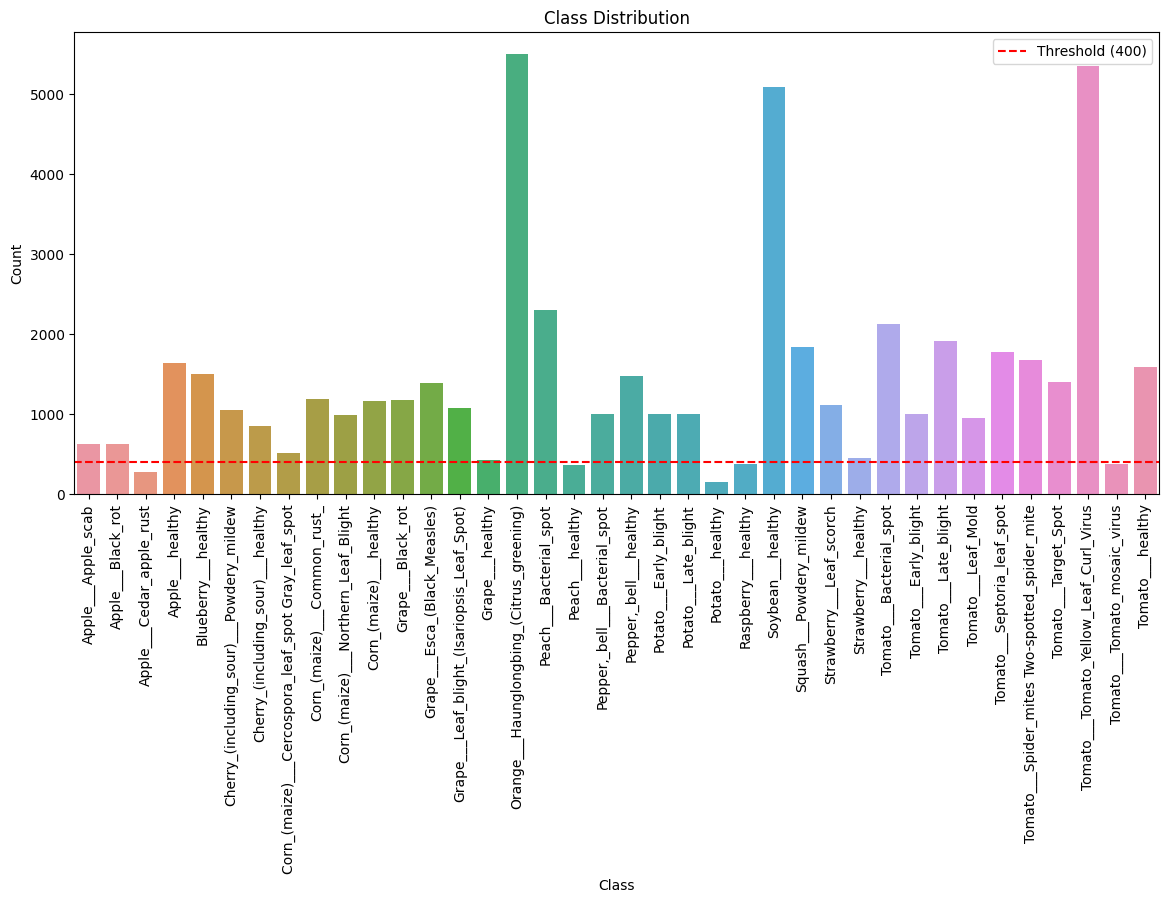

In [3]:

counts = []
for cls in classes:
    counts.append(len(os.listdir(os.path.join(DATASET_PATH, cls))))

df = pd.DataFrame({"Class": classes, "Count": counts})

threshold = 400

low_count_classes = df[df["Count"] < threshold]

print(f"\nClasses with count less than {threshold}:")
print("-" * 50)
for idx, row in low_count_classes.iterrows():
    print(f"Index: {idx}, Class: {row['Class']}, Count: {row['Count']}")

print(f"\nTotal classes below threshold: {len(low_count_classes)}")

plt.figure(figsize=(14,6))
sns.barplot(x="Class", y="Count", data=df)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.legend()
plt.show()


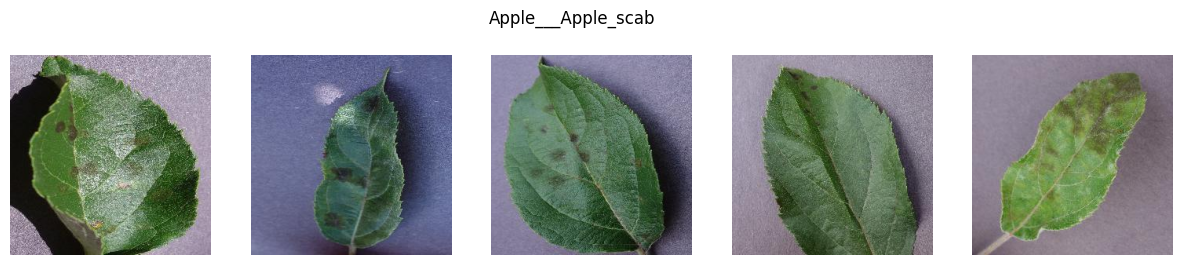

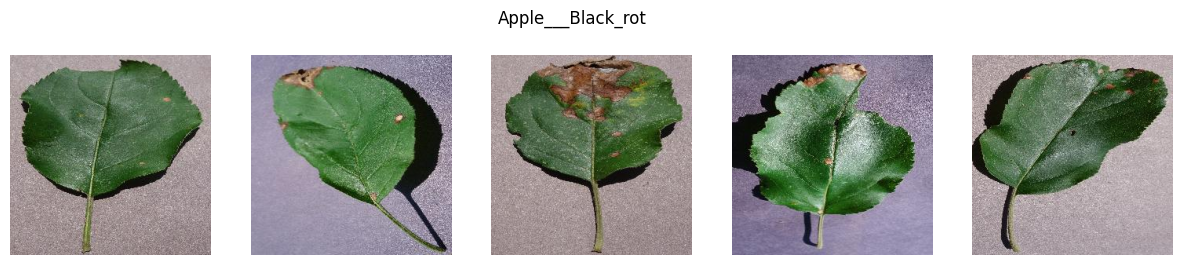

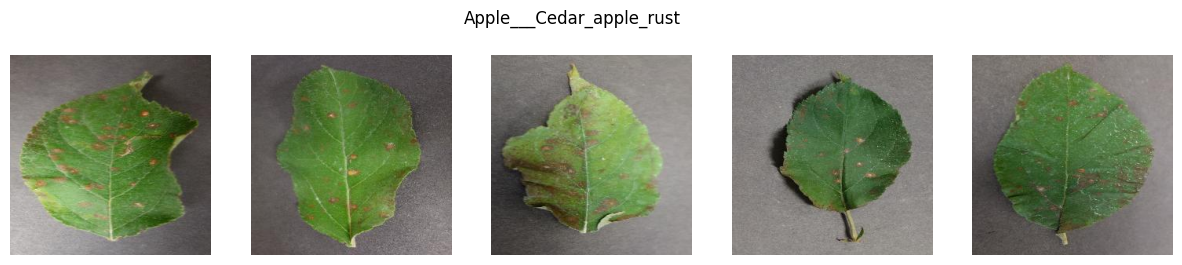

In [4]:

def show_images(class_name, n=5):
    path = os.path.join(DATASET_PATH, class_name)
    imgs = os.listdir(path)[:n]

    plt.figure(figsize=(15,3))
    for i, img in enumerate(imgs):
        plt.subplot(1, n, i+1)
        plt.imshow(Image.open(os.path.join(path, img)))
        plt.axis("off")
    plt.suptitle(class_name)
    plt.show()

for cls in classes[:3]:
    show_images(cls)


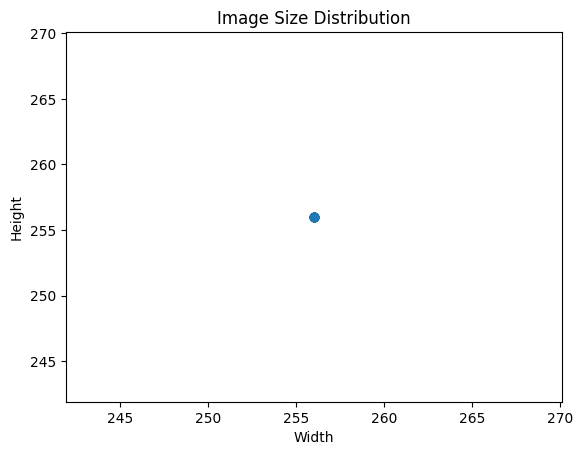

In [5]:
widths, heights = [], []

for cls in classes:
    img_path = os.path.join(DATASET_PATH, cls, os.listdir(os.path.join(DATASET_PATH, cls))[0])
    img = Image.open(img_path)
    widths.append(img.size[0])
    heights.append(img.size[1])
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()
